# CNN Autoencoder used as Noise Filter #

* Autoencoder Neural Network will be used as an image noise filter.

In [1]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other:
import random

## Data Load ##

In [ ]:
# Data format: We have a matrix with each image label and each image pixel value (28x28 = 784) 1-channel Gray-Scale

In [2]:
# Load Data as Pandas Dataframe (# Train and Test Data separated already):

fashion_df = pd.read_csv('fashion-mnist-train.csv', sep = ',')

In [3]:
fashion_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Data Visualization ##

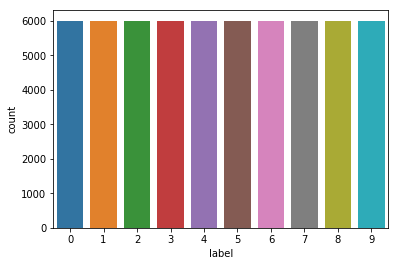

In [4]:
# Checking how many items we have for each class:
sns.countplot(fashion_df['label'], label = 'Count');

In [5]:
# Transform Dataframe to array in order to handle with image plot:
fashion_data = np.array(fashion_df, dtype = 'float32')

3.0


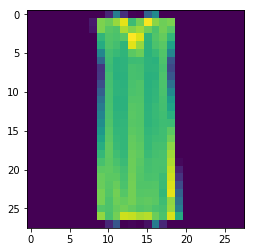

In [6]:
# Random Image plot check:
i = random.randint(1, 60000)
print(fashion_data[i,0])
plt.imshow(fashion_data[i,1:].reshape((28,28)))
#plt.imshow(fashion_data[i,1:].reshape((28,28)), cmap='gray');

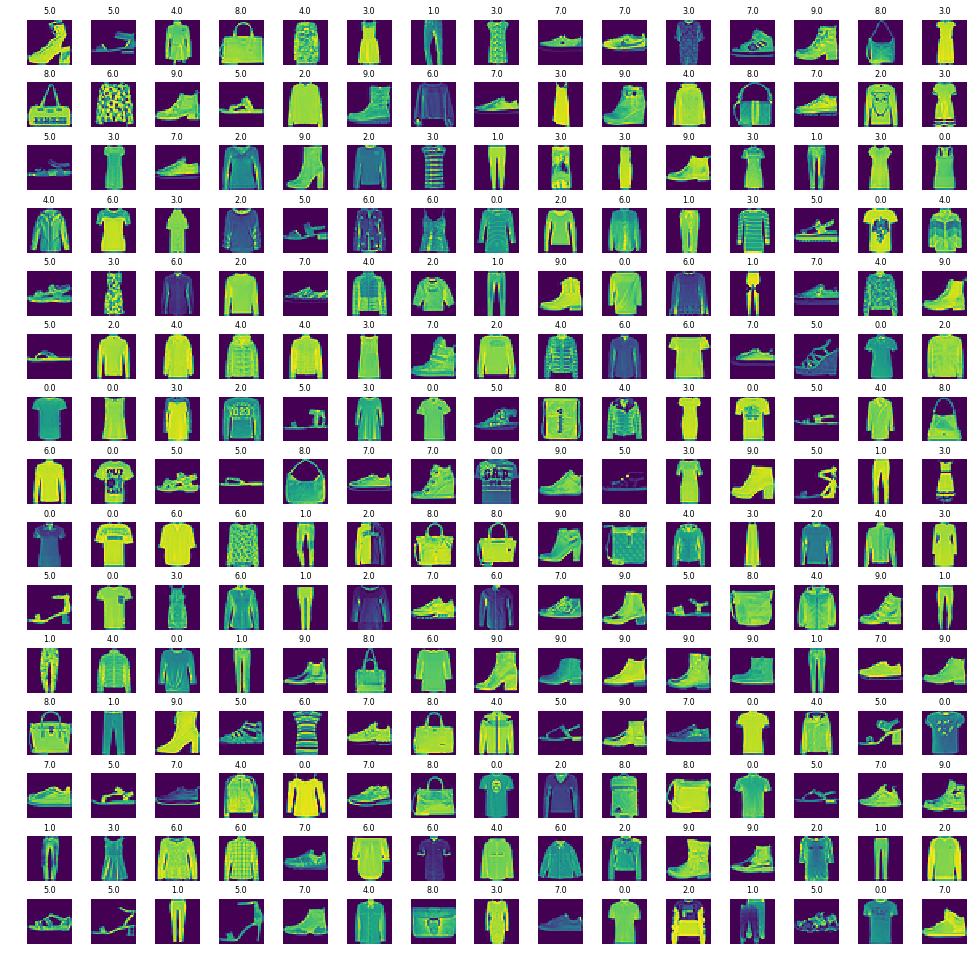

In [7]:
# Subplot loop to check image variety and their classification label:

W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_fashion = len(fashion_data)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_fashion)
    axes[i].imshow(fashion_data[index,1:].reshape((28,28)))
    axes[i].set_title(fashion_data[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Data Processing ##

In [19]:
# Normalization -> Get pixel intensity level between 0~1 for faster processing
X = fashion_data[:,1:] / 255 # Without the class label
Y = fashion_data[:,0]        # Only the class label as output

In [20]:
# Let's split data in train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5) # 80% train, 20% test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [23]:
# Lets transform array into a image format (28x28)

X_train = X_train.reshape(X_train.shape[0], *(28,28))
X_test = X_test.reshape(X_test.shape[0], *(28,28))

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)


## Noise Addition ##

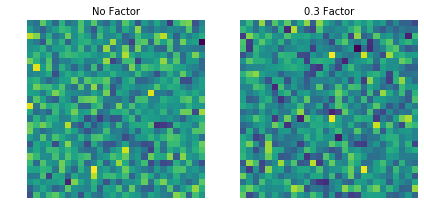

In [15]:
# Let's use numpy to add noise to the images:

# Random Example:
added_noise_1 = np.random.randn(*(28,28))

noise_factor = 0.3
added_noise_2 = noise_factor * np.random.randn(*(28,28))

fig, axes = plt.subplots(1, 2, figsize = (7,7))
axes = axes.ravel()

axes[0].imshow(added_noise_1);
axes[0].set_title('No Factor', fontsize = 10)
axes[0].axis('off')

axes[1].imshow(added_noise_2);
axes[1].set_title('0.3 Factor', fontsize = 10)
axes[1].axis('off')

plt.subplots_adjust(hspace=0.4)

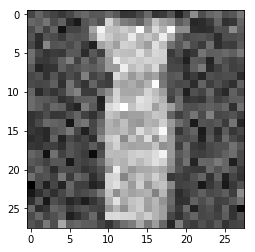

In [24]:
noise_factor = 0.2
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))
plt.imshow(noisy_sample_image, cmap='gray');

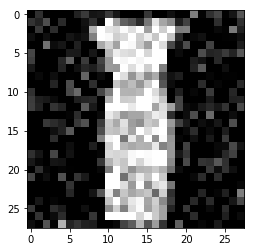

In [25]:
# Normalization of pixels to 0~1 values)
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)
plt.imshow(noisy_sample_image, cmap='gray');

In [26]:
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_train_noisy.append(sample_image_noisy)
    
X_train_noisy = np.array(X_train_noisy)
X_train_noisy.shape

(48000, 28, 28)

In [27]:
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
    sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
    sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
    X_test_noisy.append(sample_image_noisy)

X_test_noisy = np.array(X_test_noisy)
X_test_noisy.shape

(12000, 28, 28)

## Tensorflow - Neural Network Setup ##

In [ ]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf
from tensorflow.keras import layers, models

In [31]:
# NN Training Stopper Callback (after meeting desired condition)

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.001):
            print('\n\n\nReached desired accuracy. Training canceled! \n\n\n')
            self.model.stop_training = True
            
trainingStopCallback = haltCallback()

In [30]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

# Encoded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [35]:
epochs = 25
batch_size = 200
learn_rate = 0.001

# Using Sparse, no need to encode output classes:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learn_rate))
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), 
                batch_size = batch_size, epochs = epochs, callbacks = [trainingStopCallback])

Epoch 1/25
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2995
Epoch 2/25
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2970
Epoch 3/25
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2966
Epoch 4/25
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2963
Epoch 5/25
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2958
Epoch 6/25
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2956
Epoch 7/25
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2952
Epoch 8/25
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.2948
Epoch 9/25
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2945
Epoch 10/25
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.2942
Epoch 11/25
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2938
Epoch 12/25
48000/48000 [=====

## Model Results ##

In [36]:
# Let's the models prediction for 15 of the test images:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1,28,28,1))

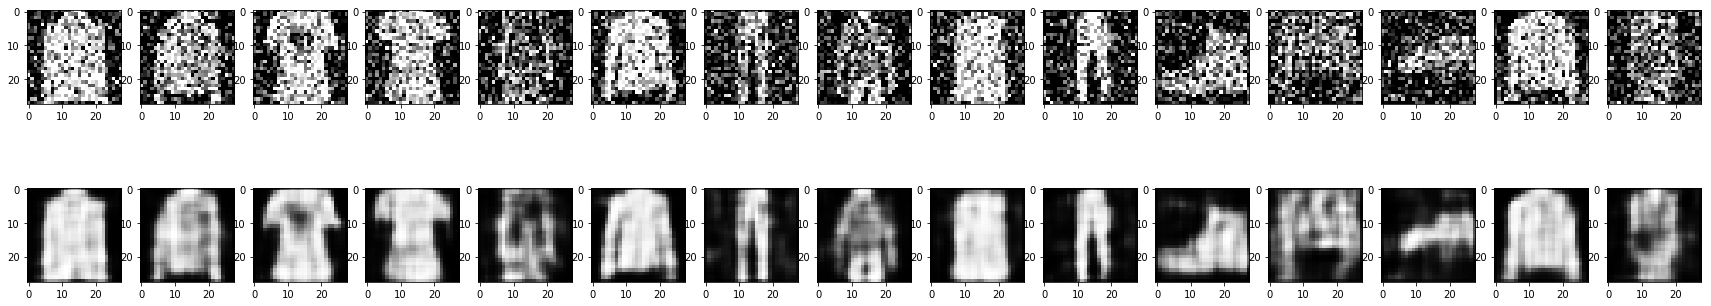

In [37]:
fig, axes = plt.subplots(2, 15, figsize=(30,6))

for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='gray')

## Notes ##

*   If stride = 1 and padding = same, the output dimensions will be the same as the input. Example: 
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
* If stride = 2 and padding = same, the output dimensions will be smaller (half)
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))

* Padding = 'same' indicates that we keep the input dimensions.
* Padding = 'valid' indicates that we loose some information (there won't be any fulfillment around the image).

Article: https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [38]:
# W = 28, F = 3, S = 1, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/1 + 1 = 28
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [39]:
# W = 28, F = 3, S = 2, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/2 + 1 = 14
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [40]:
# # When padding = valid, there is no "border fulfillment" in the image
# W = 28, F = 3, S = 1, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/1 + 1 = 26
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="valid", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [41]:
# When padding = valid, there is no "border fulfillment" in the image
# W = 28, F = 3, S = 2, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/2 + 1 = 13
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="valid", 
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
